In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from my_style import set_journal_style
from scipy.optimize import curve_fit # 曲线回归
from scipy.stats import t

set_journal_style()

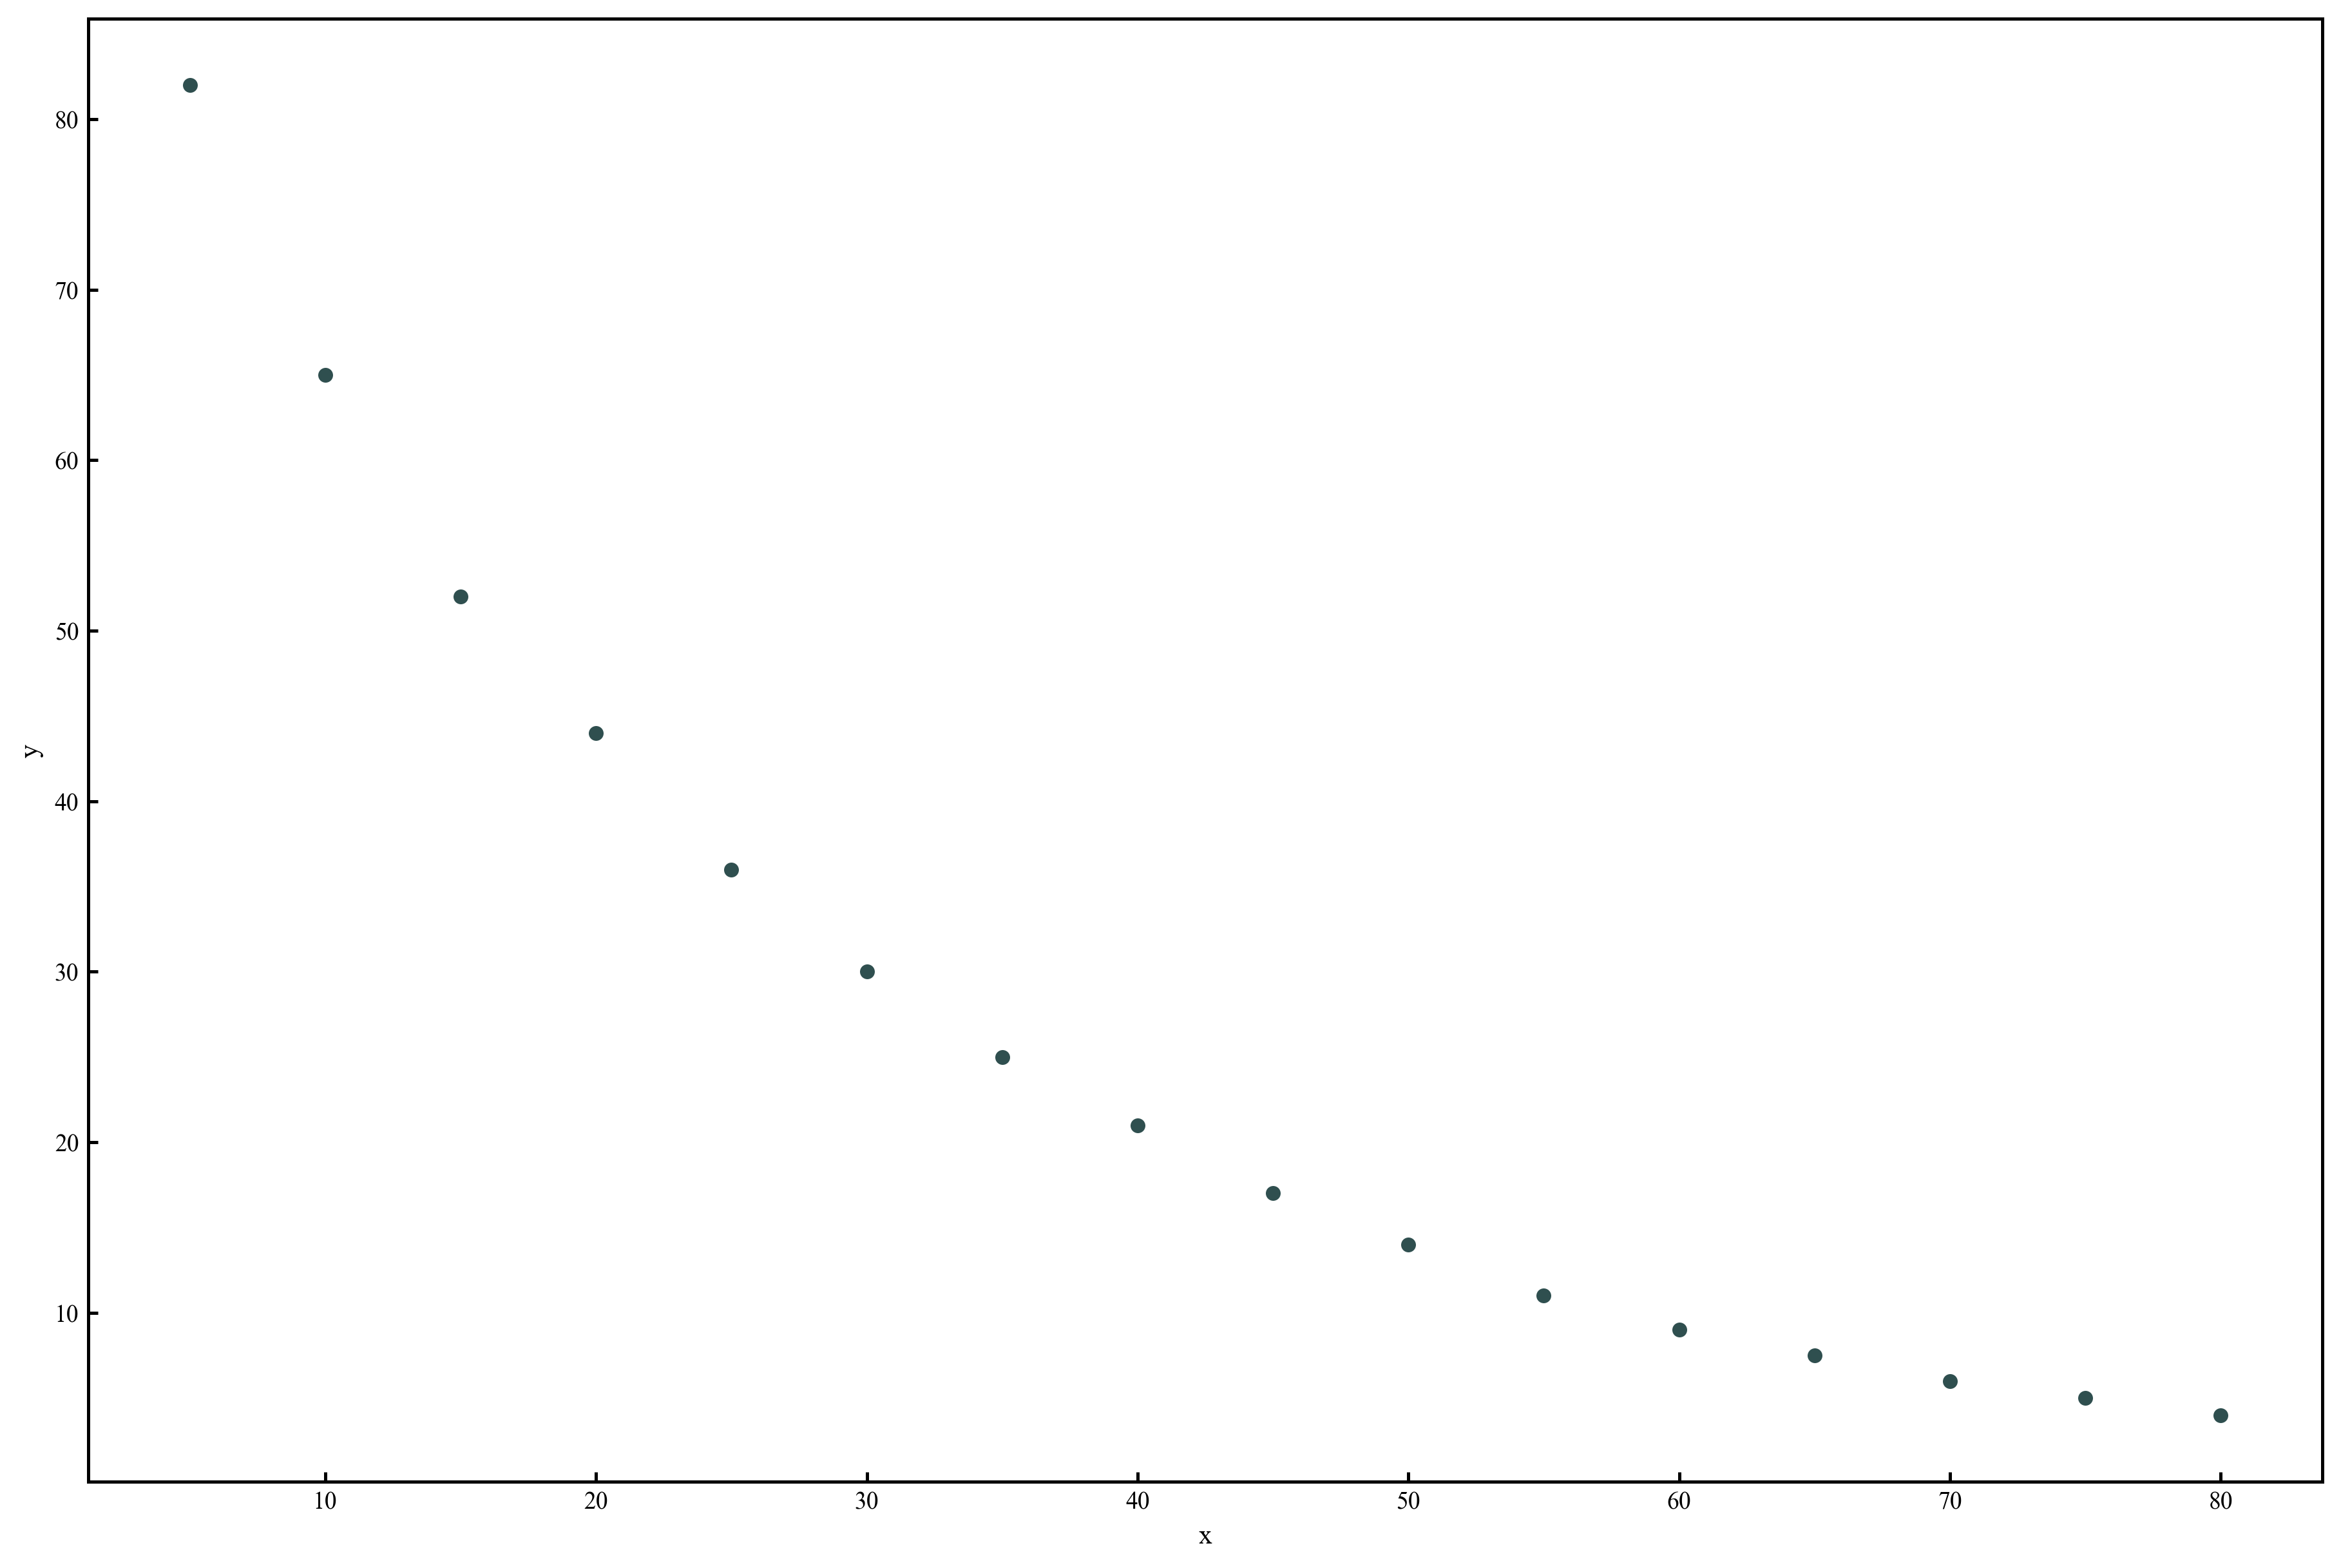

In [2]:
# 加载数据
light = pd.read_csv('light.csv')
# 绘制散点图
fig,ax = plt.subplots(figsize=(12, 8), layout='constrained')

sns.scatterplot(x='x',
            y='y',
            ax = ax, 
            data=light)

# 显示图形
plt.show()

In [3]:
# 曲线回归
# 定义模型函数
def f(x,a,b):
    return a*np.exp(b*x)
# 加载数据
x = light['x']
y = light['y']
# 调用 curve_fit
# 示例：根据数据估算初始参数
a_guess = np.max(y) - np.min(y)
b_guess = 0.1  # 假设存在轻微衰减
c_guess = np.min(y)
p0 = [a_guess, b_guess]
params, covariance = curve_fit(f,          # 自定义的模型函数
                               x,          # 自变量数据（一维数组）
                               y,          # 因变量数据（一维数组）
                               p0=p0,    # 初始参数猜测（列表或数组）
                               maxfev=2000,  # 增加最大迭代次数
                               method='lm' # 优化方法（默认 'lm'，若设置 bounds 需用 'trf' 或 'dogbox'）
)
# 解包参数
a_fit, b_fit = params
# 评估拟合效果
# R2
residuals = y - f(x, a_fit, b_fit)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
print(f"R² = {r_squared:.3f}")
# 参数误差
perr = np.sqrt(np.diag(covariance))
print(f"参数误差: a ± {perr[0]:.3f}, b ± {perr[1]:.3f}")
print(f'y = {a_fit}e^{b_fit}x')

R² = 0.999
参数误差: a ± 0.935, b ± 0.000
y = 97.90289595963205e^-0.039652112796150496x


In [4]:
x_fit = np.linspace(x.min(), x.max(), 200)
y_fit = f(x_fit, a_fit, b_fit)

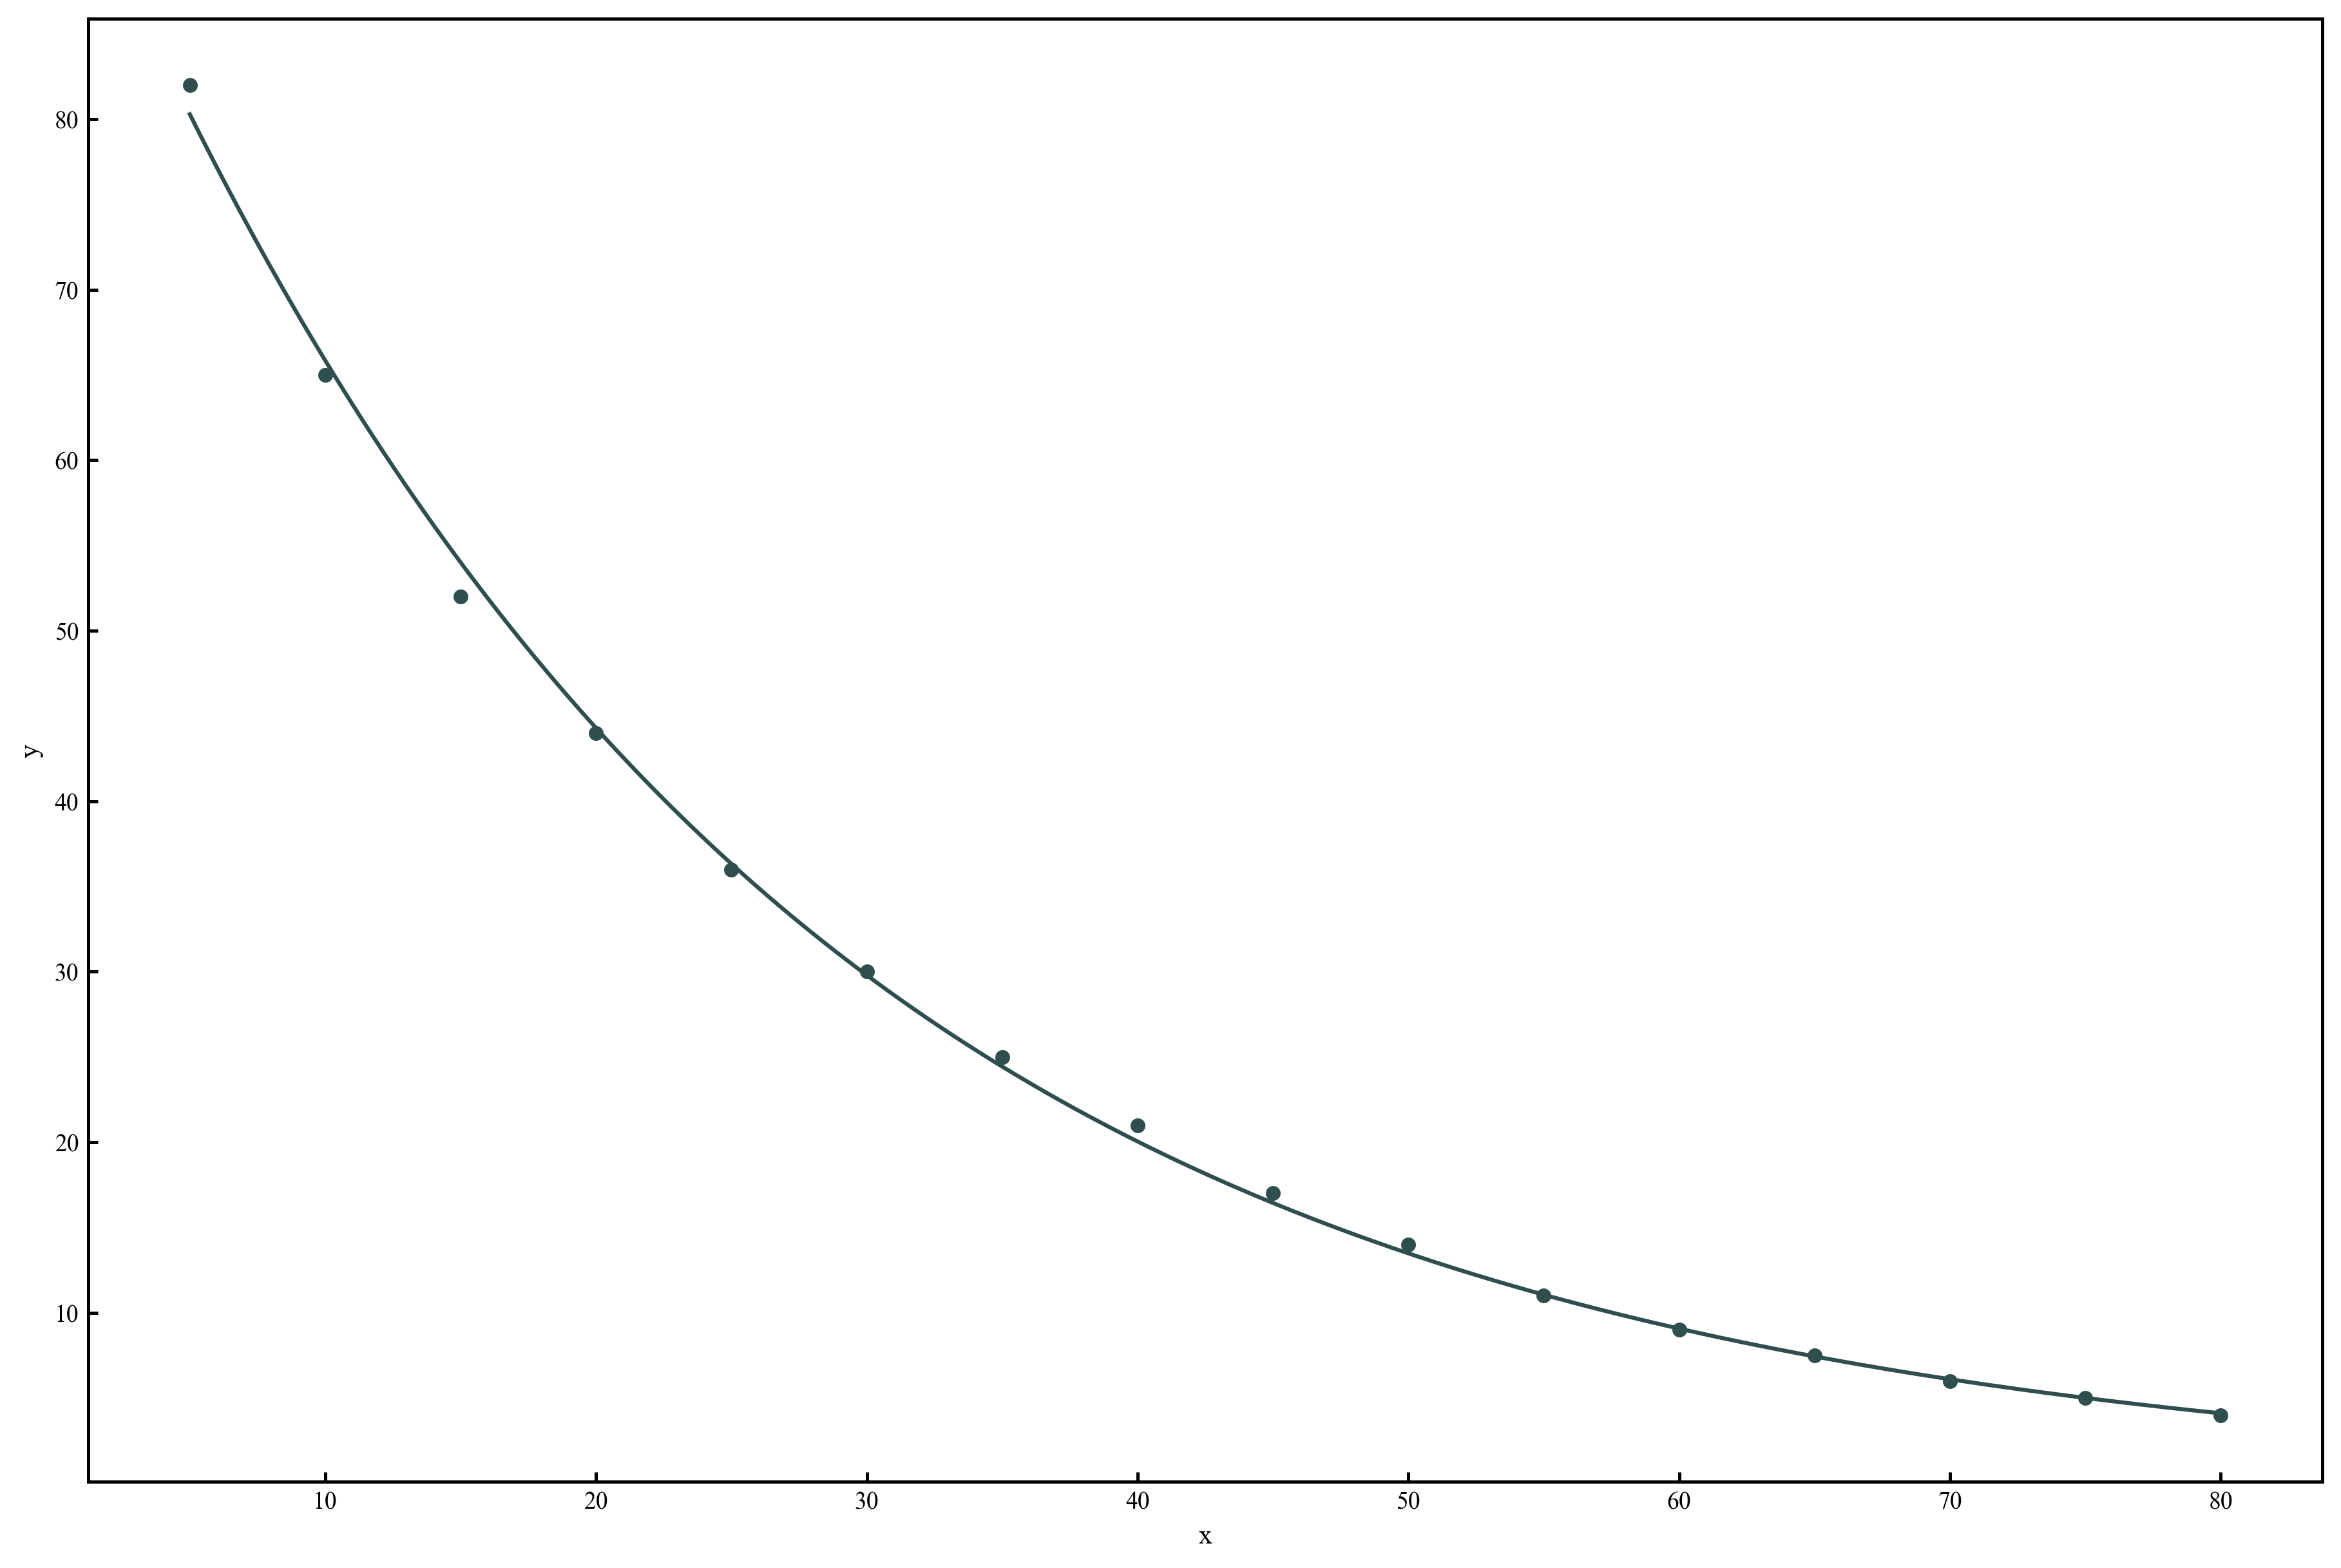

In [5]:
# 可视化结果
fig,ax = plt.subplots(figsize=(12, 8), layout='constrained')
sns.scatterplot(x='x',
            y='y',
            ax = ax, 
            data=light)
sns.lineplot(x=x_fit,
            y=y_fit,
            ax = ax)
plt.show()